In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_inline import backend_inline
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

from myCNN.nn import *
from myCNN.utils import *

backend_inline.set_matplotlib_formats('svg')

def draw_confusion_matrix(label_true, label_pred, label_name, title="Confusion Matrix", pdf_save_path=None, dpi=100):
    cm = confusion_matrix(y_true=label_true, y_pred=label_pred, normalize='true')
    plt.figure(figsize=(8, 8))
    plt.imshow(cm, cmap='Blues')
    plt.title(title)
    plt.xlabel("Predict label")
    plt.ylabel("Truth label")
    plt.yticks(range(label_name.__len__()), label_name)
    plt.xticks(range(label_name.__len__()), label_name, rotation=45)

    plt.tight_layout()

    plt.colorbar()

    for i in range(label_name.__len__()):
        for j in range(label_name.__len__()):
            color = (1, 1, 1) if i == j else (0, 0, 0) 
            value = f'{cm[j, i]: .3f}'
            plt.text(i, j, value, verticalalignment='center', horizontalalignment='center', color=color)

    if not pdf_save_path is None:
        plt.savefig(pdf_save_path, bbox_inches='tight', dpi=dpi)


In [2]:
train_csv = pd.read_csv('data/train.csv')
X = train_csv.iloc[:, 1:].to_numpy() / 256.
y = train_csv.iloc[:, 0].to_numpy()

net = Sequential(
    Conv2d(1, 24, 5, 1, 0), ReLU(),
    MaxPool2d(2, 2, 0),
    Conv2d(24, 60, 5, 1, 0), ReLU(),
    MaxPool2d(2, 2, 0),
    Flatten(),
    Linear(60*4*4, 240), Dropout(0.8), ReLU(),
    Linear(240, 84), Dropout(0.8), ReLU(),
    Linear(84, 10)
)

load('param.npz', net.parameters())
print('Successfully loaded parameters')

Successfully loaded parameters


In [3]:
pred = []
for i in range(0, len(y), 128):
    x = X[i: min(len(y), i + 128)].reshape(-1, 1, 28, 28)
    _y = y[i: min(len(y), i + 128)]
    pred.extend(np.argmax(net.forward(x), axis=1).tolist())

pred = np.array(pred)

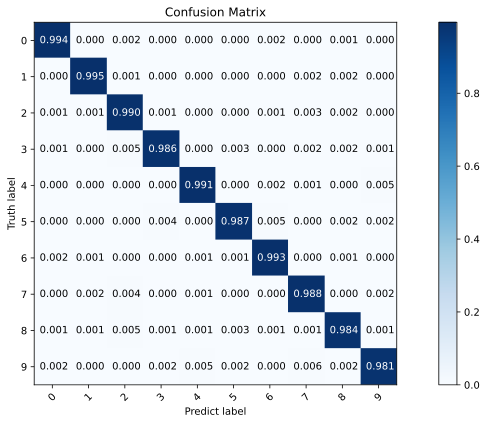

In [15]:
label = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
draw_confusion_matrix(y, pred, label, pdf_save_path='报告/figure/confuse.svg')

In [5]:
acc = accuracy_score(y, pred)
recall = recall_score(y, pred, average="macro")
f1 = f1_score(y, pred, average="macro")
print(f'acc: {acc}\nrecall: {recall}\nf1: {f1}')

acc: 0.9889523809523809
recall: 0.988881557722771
f1: 0.9888935812078378
